<a href="https://colab.research.google.com/github/Amalkw1/machinelearningproject/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from math import sqrt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,6]


In [ ]:

df=pd.read_csv('students_mental_health_survey.csv')
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

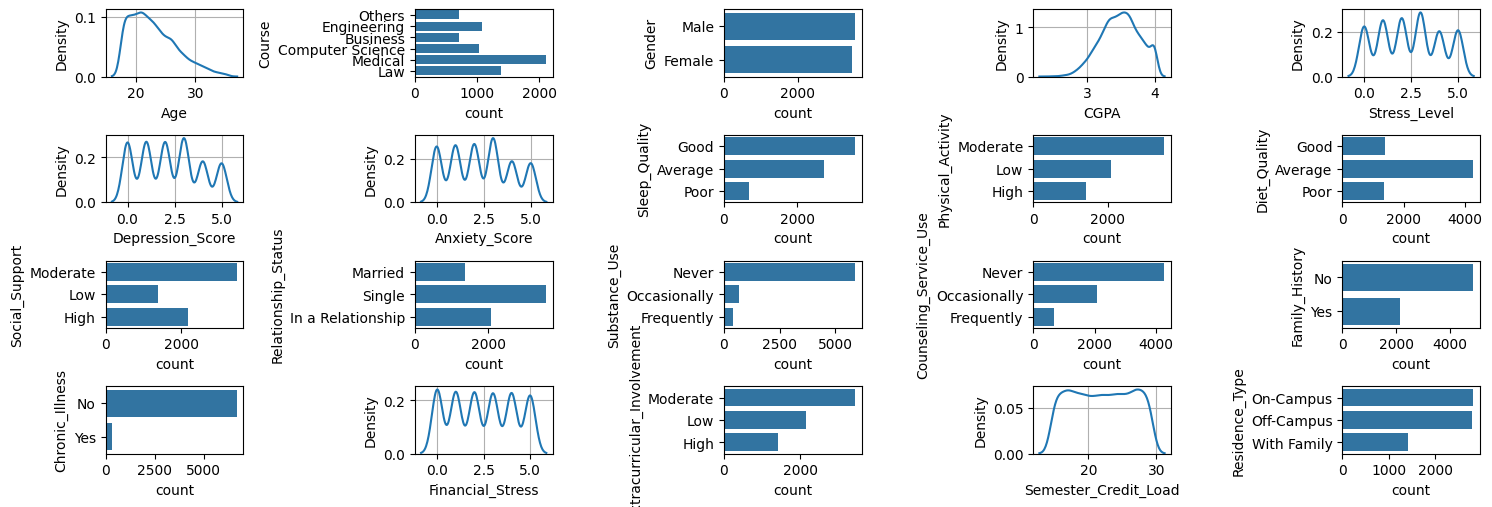

In [ ]:
r=5
c=5
it=1
for i,j in enumerate(df.columns):
    plt.subplot(r,c,it)
    if df[j].dtype=='object':
        sns.countplot(y=df[j])
    else:
        sns.kdeplot(df[j])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

In [ ]:
df=df.dropna()
df.shape

(6995, 20)

In [ ]:
cat = df.select_dtypes(include='object')
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,Others,Male,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,Moderate,On-Campus
1,Engineering,Female,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,Low,On-Campus
2,Business,Female,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,High,On-Campus
4,Business,Male,Good,Low,Average,High,Married,Never,Never,No,Yes,High,On-Campus
5,Medical,Female,Good,Moderate,Good,High,Single,Never,Never,No,No,Moderate,Off-Campus


In [ ]:
for i in ['Family_History','Chronic_Illness']:
    cat[i] = cat[i].replace({'Yes':1,'No':0})

In [ ]:
for i in ['Physical_Activity','Social_Support','Extracurricular_Involvement']:
    cat[i] = cat[i].replace({'Low':1,'Moderate':2,'High':3})

In [ ]:
for i in ['Sleep_Quality','Diet_Quality']:
    cat[i] = cat[i].replace({'Poor':1,'Average':2,'Good':3})

In [ ]:
for i in ['Substance_Use','Counseling_Service_Use']:
    cat[i] = cat[i].replace({'Never':0,'Occasionally':1,'Frequently':2})

In [ ]:
cat['Course']=cat['Course'].map(cat['Course'].value_counts(normalize=True))
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.101823,Male,3,2,3,2,Married,0.0,0,0,0,2,On-Campus
1,0.152663,Female,2,1,2,1,Single,1.0,1,0,0,1,On-Campus
2,0.102108,Female,3,1,2,2,In a Relationship,0.0,1,0,0,3,On-Campus
3,0.146397,Male,2,1,2,2,Single,NaN,0,0,0,2,Off-Campus
4,0.102108,Male,3,1,2,3,Married,0.0,0,0,1,3,On-Campus


In [ ]:
cat['Gender'] = cat['Gender'].replace({'Male':1,'Female':0})
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.101823,1,3,2,3,2,Married,0.0,0,0,0,2,On-Campus
1,0.152663,0,2,1,2,1,Single,1.0,1,0,0,1,On-Campus
2,0.102108,0,3,1,2,2,In a Relationship,0.0,1,0,0,3,On-Campus
3,0.146397,1,2,1,2,2,Single,NaN,0,0,0,2,Off-Campus
4,0.102108,1,3,1,2,3,Married,0.0,0,0,1,3,On-Campus


In [ ]:
cat['Relationship_Status'].value_counts(normalize=True)

Relationship_Status
Single               0.508972
In a Relationship    0.296069
Married              0.194959
Name: proportion, dtype: float64

In [ ]:
cat['Relationship_Status']=cat['Relationship_Status'].map(cat['Relationship_Status'].value_counts(normalize=True))
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.101823,1,3,2,3,2,0.194959,0.0,0,0,0,2,On-Campus
1,0.152663,0,2,1,2,1,0.508972,1.0,1,0,0,1,On-Campus
2,0.102108,0,3,1,2,2,0.296069,0.0,1,0,0,3,On-Campus
3,0.146397,1,2,1,2,2,0.508972,NaN,0,0,0,2,Off-Campus
4,0.102108,1,3,1,2,3,0.194959,0.0,0,0,1,3,On-Campus


In [ ]:
cat['Residence_Type']=cat['Residence_Type'].map(cat['Residence_Type'].value_counts(normalize=True))
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.101823,1,3,2,3,2,0.194959,0.0,0,0,0,2,0.400883
1,0.152663,0,2,1,2,1,0.508972,1.0,1,0,0,1,0.400883
2,0.102108,0,3,1,2,2,0.296069,0.0,1,0,0,3,0.400883
3,0.146397,1,2,1,2,2,0.508972,NaN,0,0,0,2,0.397038
4,0.102108,1,3,1,2,3,0.194959,0.0,0,0,1,3,0.400883


In [ ]:
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.101823,1,3,2,3,2,0.194959,0.0,0,0,0,2,0.400883
1,0.152663,0,2,1,2,1,0.508972,1.0,1,0,0,1,0.400883
2,0.102108,0,3,1,2,2,0.296069,0.0,1,0,0,3,0.400883
3,0.146397,1,2,1,2,2,0.508972,NaN,0,0,0,2,0.397038
4,0.102108,1,3,1,2,3,0.194959,0.0,0,0,1,3,0.400883


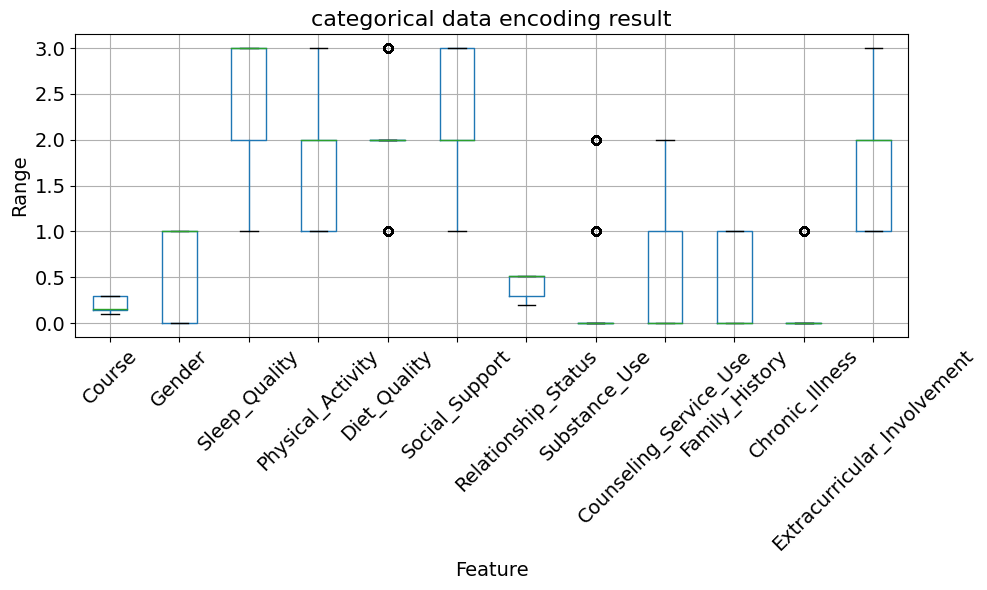

In [ ]:
plt.figure(figsize=(10, 6))

ax = cat.boxplot(rot=45, fontsize=14)

ax.set_title('categorical data encoding result', fontsize=16)
ax.set_xlabel('Feature', fontsize=14)
ax.set_ylabel('Range', fontsize=14)


plt.tight_layout()
plt.show()

In [ ]:
# Create a new dataframe with selected columns from cat
cat_selected = cat[['Course', 'Gender', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type']]

# Create a new dataframe with selected columns from df
df_selected = df[['Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']]

# Concatenate the two dataframes horizontally (axis=1)
clean_df = pd.concat([cat_selected, df_selected], axis=1)

In [ ]:

columns_ordered = [
    'Course', 'Gender', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
    'Family_History', 'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
    'Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress',
    'Semester_Credit_Load', 'CGPA'
]

# Reorder the DataFrame columns
clean_df = clean_df[columns_ordered]

In [ ]:
#compute corr for each feature with target class
correlation_with_cgpa = clean_df.corr()['CGPA'].sort_values(ascending=False)
for feature, correlation in correlation_with_cgpa.items():
    print(f"Correlation between CGPA and {feature}: {correlation}")

Correlation between CGPA and CGPA: 1.0
Correlation between CGPA and Age: 0.014598578970171071
Correlation between CGPA and Substance_Use: 0.012889929261113089
Correlation between CGPA and Physical_Activity: 0.008607345978999594
Correlation between CGPA and Extracurricular_Involvement: 0.00840344980219738
Correlation between CGPA and Stress_Level: 0.005142968079436889
Correlation between CGPA and Course: 0.00386887807772651
Correlation between CGPA and Anxiety_Score: 0.003504046438191637
Correlation between CGPA and Social_Support: 0.0014145319336501174
Correlation between CGPA and Residence_Type: 9.318843660720696e-05
Correlation between CGPA and Diet_Quality: -0.00010323416049536343
Correlation between CGPA and Chronic_Illness: -0.0003117233762100251
Correlation between CGPA and Counseling_Service_Use: -0.0015821718273877257
Correlation between CGPA and Semester_Credit_Load: -0.004283955215397354
Correlation between CGPA and Sleep_Quality: -0.011050721320647052
Correlation between CGP

In [ ]:
# Select the features for which you want to compute the statistics
feature_names = ['Course', 'Gender', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
    'Family_History', 'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
    'Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress',
    'Semester_Credit_Load', 'CGPA']  # Replace with the names of the desired features

for feature_name in feature_names:
    # Extract the values of the selected feature
    feature_values = clean_df[feature_name].values

    # Compute the mean, standard deviation, minimum, median, and maximum
    mean_value = np.mean(feature_values)
    std_value = np.std(feature_values)
    min_value = np.min(feature_values)
    median_value = np.median(feature_values)
    max_value = np.max(feature_values)

    # Print the computed statistics for the current feature
    print("Feature:", feature_name)
    print("Mean:", mean_value)
    print("Standard Deviation:", std_value)
    print("Minimum:", min_value)
    print("Median:", median_value)
    print("Maximum:", max_value)
    print()

Feature: Course
Mean: 0.19429784132077554
Standard Deviation: 0.07533741017222113
Minimum: 0.10182284249501566
Median: 0.15266305895756194
Maximum: 0.299772144688123

Feature: Gender
Mean: 0.5051267445172316
Standard Deviation: 0.4999737157997958
Minimum: 0
Median: 1.0
Maximum: 1

Feature: Sleep_Quality
Mean: 2.4117060666476786
Standard Deviation: 0.6640842875312003
Minimum: 1
Median: 3.0
Maximum: 3

Feature: Physical_Activity
Mean: 1.9030190828823697
Standard Deviation: 0.6994073248228048
Minimum: 1
Median: 2.0
Maximum: 3

Feature: Diet_Quality
Mean: 2.0022785531187695
Standard Deviation: 0.6262513582930572
Minimum: 1
Median: 2.0
Maximum: 3

Feature: Social_Support
Mean: 2.113927655938479
Standard Deviation: 0.702039373239999
Minimum: 1
Median: 2.0
Maximum: 3

Feature: Relationship_Status
Mean: 0.38471833772054326
Standard Deviation: 0.13116739999130728
Minimum: 0.1949587012247223
Median: 0.5089718029051552
Maximum: 0.5089718029051552

Feature: Substance_Use
Mean: nan
Standard Deviati

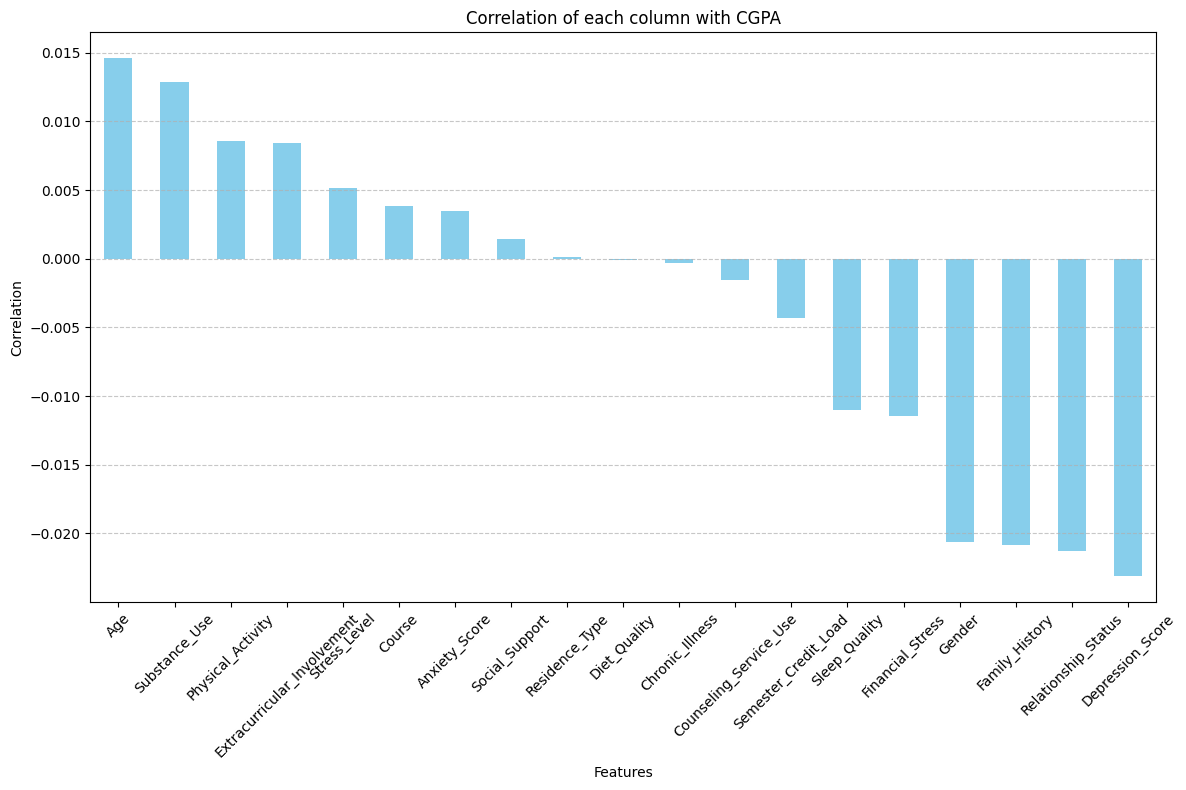

In [ ]:
# Calculate correlation
correlation_with_cgpa = clean_df.corr()['CGPA'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlation_with_cgpa.drop('CGPA').plot(kind='bar', color='skyblue')
plt.title('Correlation of each column with CGPA')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Splitting the dataframe into 70% training and 30% testing
train_df, test_df = train_test_split(clean_df, test_size=0.3, random_state=42)
train_df.shape

(4896, 20)

In [ ]:
test_df.shape

(2099, 20)

In [ ]:
#saving the data
clean_df.to_csv("clean_df.csv",index = False)
#train_df.to_csv("train_df.csv",index = False)
#test_df.to_csv("test_df.csv",index = False)

Mean Squared Error: 0.08811455788470701


Root Mean Squared Error (RMSE): 0.30


Mean Absolute Error (MAE): 0.24


R-squared (R2): -0.07




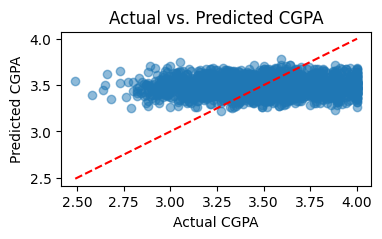

Cross-Validation Results:
Mean Squared Error: 0.08811455788470701


Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.25
R-squared (R2): -0.09


In [ ]:
#knn regresor with feature selection
#building the model using KNN
X_train = train_df.drop(['Course','Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status',
     'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
     'Stress_Level','Anxiety_Score',
     'CGPA'], axis=1)
y_train = train_df['CGPA']

X_test = test_df.drop(['Course','Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status',
     'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
     'Stress_Level','Anxiety_Score',
     'CGPA'], axis=1)
y_test = test_df['CGPA']

# Initialize KNN Regressor
k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# testing the data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('\n')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print('\n')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')

# Plotting actual vs. predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted CGPA')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

from sklearn.model_selection import train_test_split, cross_val_score


X = clean_df.drop(columns=['Course','Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status',
     'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
     'Stress_Level','Anxiety_Score',
     'CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create an instance of the LightGBM regressor
k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=k)

#cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


cv_predictions = cross_val_predict(knn_regressor, X_train, y_train, cv=5)

# Step 5: Calculate MSE, RMSE, MAE, and R2 based on cross-validation predictions
cv_mse = mean_squared_error(y_train, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_mae = mean_absolute_error(y_train, cv_predictions)
cv_r2 = r2_score(y_train, cv_predictions)

# Print cross-validation results
print("Cross-Validation Results:")
cv_mse = mean_squared_error(y_train, cv_predictions)
print(f'Mean Squared Error: {mse}')
print('\n')
print(f'Root Mean Squared Error (RMSE): {cv_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {cv_mae:.2f}')
print(f'R-squared (R2): {cv_r2:.2f}')

Mean Squared Error: 0.0894674821343497


Root Mean Squared Error (RMSE): 0.30


Mean Absolute Error (MAE): 0.24


R-squared (R2): -0.09




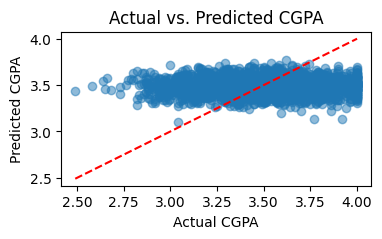

Cross-Validation Results:
Mean Squared Error: 0.0894674821343497


Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.25
R-squared (R2): -0.10


In [ ]:
#building the model using KNN before feature selection
X_train = train_df.drop('CGPA', axis=1)
y_train = train_df['CGPA']

X_test = test_df.drop('CGPA', axis=1)
y_test = test_df['CGPA']

# Initialize KNN Regressor
k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# testing the data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('\n')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print('\n')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')

# Plotting actual vs. predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted CGPA')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

from sklearn.model_selection import train_test_split, cross_val_score


X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create an instance of the LightGBM regressor
k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=k)

#cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


cv_predictions = cross_val_predict(knn_regressor, X_train, y_train, cv=5)

# Step 5: Calculate MSE, RMSE, MAE, and R2 based on cross-validation predictions
cv_mse = mean_squared_error(y_train, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_mae = mean_absolute_error(y_train, cv_predictions)
cv_r2 = r2_score(y_train, cv_predictions)

# Print cross-validation results
print("Cross-Validation Results:")
cv_mse = mean_squared_error(y_train, cv_predictions)
print(f'Mean Squared Error: {mse}')
print('\n')
print(f'Root Mean Squared Error (RMSE): {cv_rmse:.2f}')
print(f'Mean Absolute Error (MAE): {cv_mae:.2f}')
print(f'R-squared (R2): {cv_r2:.2f}')


In [ ]:
# Define candidate hyperparameters
hp_candidates = [
    {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
     'weights': ['uniform', 'distance'],
     'p': [1, 2, 5]}
]

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor()

# Create a grid search object
grid = GridSearchCV(estimator=knn_regressor,
                    param_grid=hp_candidates,
                    cv=5,  # You can adjust the number of cross-validation folds
                    verbose=1,
                    scoring='neg_mean_squared_error',  # Use a regression metric
                    n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to your data
grid.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_model = grid.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Metrics:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"R-squared (R2): {r2_best:.2f}")



Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best hyperparameters: {'n_neighbors': 15, 'p': 5, 'weights': 'uniform'}
Best Model Metrics:
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
Mean Absolute Error (MAE): 0.24
R-squared (R2): -0.07


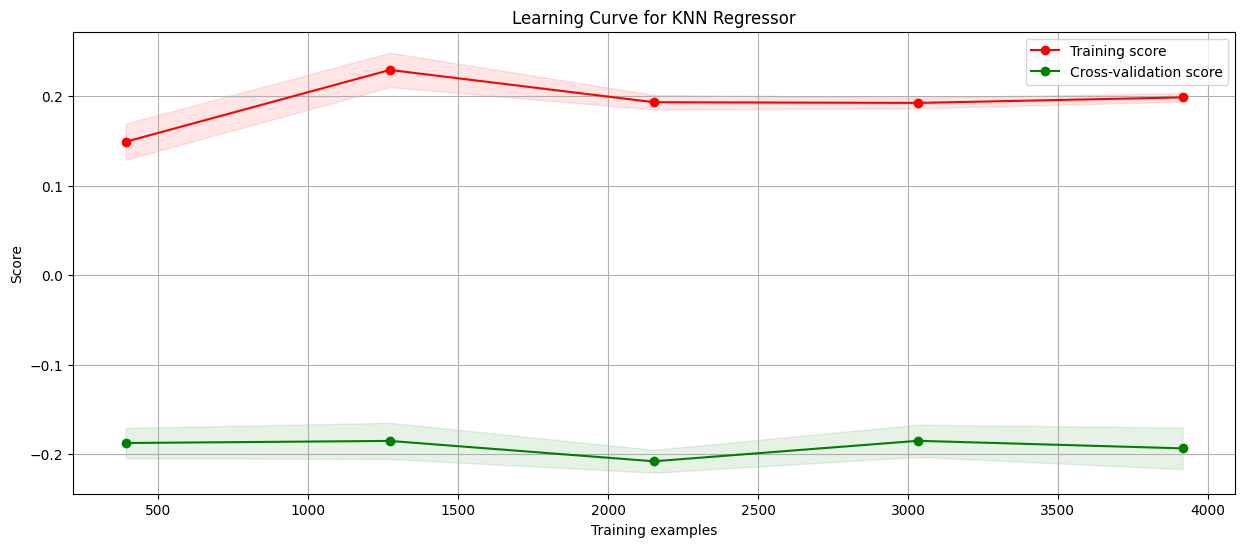

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for KNN Regressor
plot_learning_curve(knn_regressor, 'Learning Curve for KNN Regressor', X_train, y_train, cv=5)
plt.show()


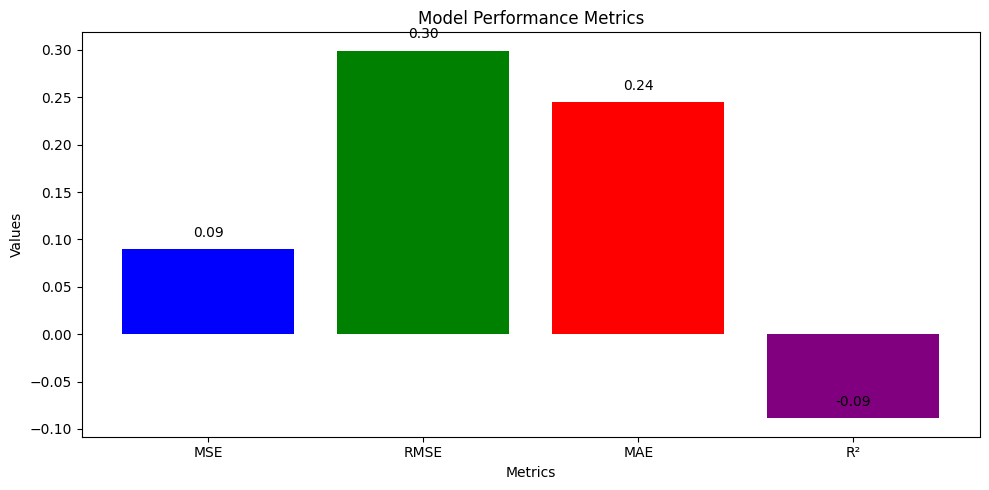

In [ ]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:


# feature selection Random Forest Regressor Model
X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Random Forest Classifier
reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model using the training sets
reg.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = reg.predict(X_test)



# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')


#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Mean Squared Error (MSE): 0.08377559192472606


Root Mean Squared Error (RMSE): 0.289440135303876


Mean Absolute Error (MAE): 0.24


R-squared (R2): -0.02




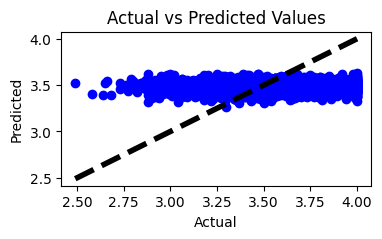

In [ ]:
#Random Forest Regressor Model
X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Random Forest Classifier
reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
reg.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = reg.predict(X_test)

# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')


#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (MSE): 0.08305219834762714


Root Mean Squared Error (RMSE): 0.288187783133892


Mean Absolute Error (MAE): 0.23


R-squared (R2): -0.01




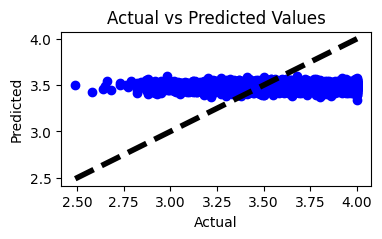

In [ ]:
# the model after applying optimization
#Random Forest Regressor Model
X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
# Extract the best parameters
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
# Create a Random Forest Classifier
reg = RandomForestRegressor(n_estimators=best_n_estimators,max_depth=best_max_depth, random_state=42)

# Train the model using the training sets
reg.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = reg.predict(X_test)

# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')


#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

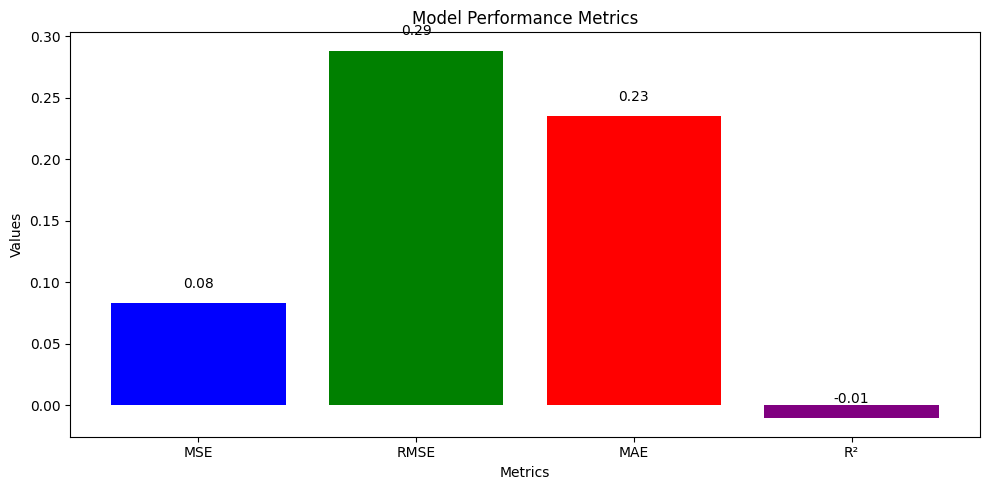

In [ ]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 0.09948351477414148


Root Mean Squared Error (RMSE): 0.3154100739896262


Mean Absolute Error (MAE): 0.25


R-squared (R2): -0.21




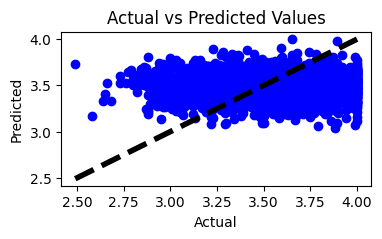

In [ ]:

import xgboost as xgb


X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create xgb Classifier
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')# Train the model using the training sets
xgb_regressor.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_regressor.predict(X_test)

# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')


#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


Mean Squared Error (MSE): 0.09851832674375621


Root Mean Squared Error (RMSE): 0.3138762921020895


Mean Absolute Error (MAE): 0.25


R-squared (R2): -0.20




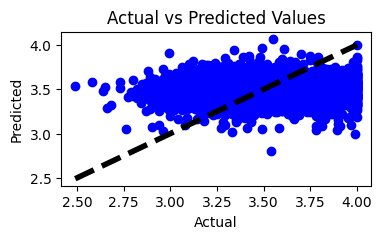

In [ ]:
# XGboost with feature selection
X = clean_df.drop(columns=[
'Course','Physical_Activity', 'Diet_Quality',
    'Social_Support', 'Relationship_Status',
     'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
     'Stress_Level','Anxiety_Score',
     'CGPA'])
y = df[['CGPA']].copy()
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create xgb Classifier
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')# Train the model using the training sets
xgb_regressor.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_regressor.predict(X_test)


# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')


#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# the model after applying optimization
X = clean_df.drop(columns=['CGPA'])
y = df[['CGPA']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    # Add more parameters here if needed
}

# Create xgb Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score (negative MSE): -0.08284445223551291
Mean Squared Error (MSE): 0.08245925138431609


Root Mean Squared Error (RMSE): 0.287157189330715


Mean Absolute Error (MAE): 0.23


R-squared (R2): -0.00




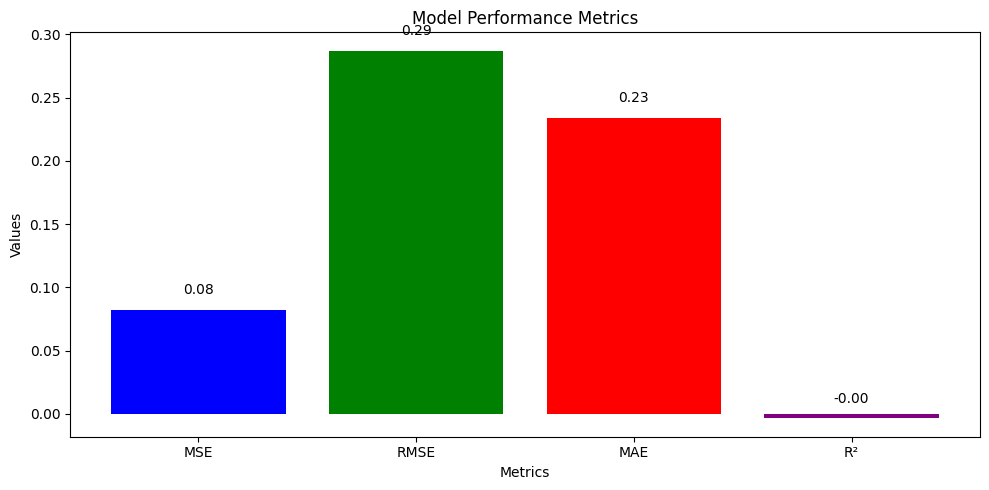

In [ ]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 4896, number of used features: 19
[LightGBM] [Info] Start training from score 3.488178


Mean Squared Error (MSE): 0.10704319520743866


Root Mean Squared Error (RMSE): 0.327174563814852


Mean Absolute Error (MAE): 0.27


R-squared (R2): -0.30




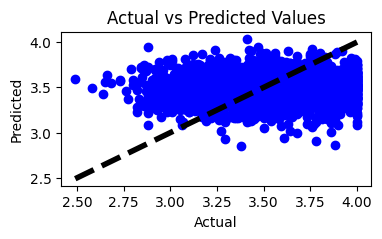

In [ ]:
#Light Gradient Boosting Model

import lightgbm as lgb

#X = clean_df.drop(columns=['CGPA'])
#y = df[['CGPA']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 40,
    'max_depth': 12,
    'learning_rate': 0.45,
    'n_estimators': 100,
    'force_row_wise': True,
}

model = lgb.LGBMRegressor(**params)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

# Model Accuracy using Root Mean Squared Error
print('\n')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print('\n')
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
print('\n')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print('\n')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')
print('\n')

#plot actual vs predicted values
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'num_leaves': [20, 30, 40],  # Adjust the range as needed
    'max_depth': [10, 12, 15],  # Adjust the range as needed
    'learning_rate': [0.1, 0.2, 0.3],  # Adjust the range as needed
    'n_estimators': [50, 100, 200]  # Adjust the range as needed
}

# Create LGBM Regressor
lgb_regressor = lgb.LGBMRegressor(objective='regression', metric='rmse')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Accuracy using Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 3916, number of used features: 19
[LightGBM] [Info] Start training from score 3.486216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the train set: 3917, number of used features: 19
[LightGBM] [Info] Start training from score 3.491090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you

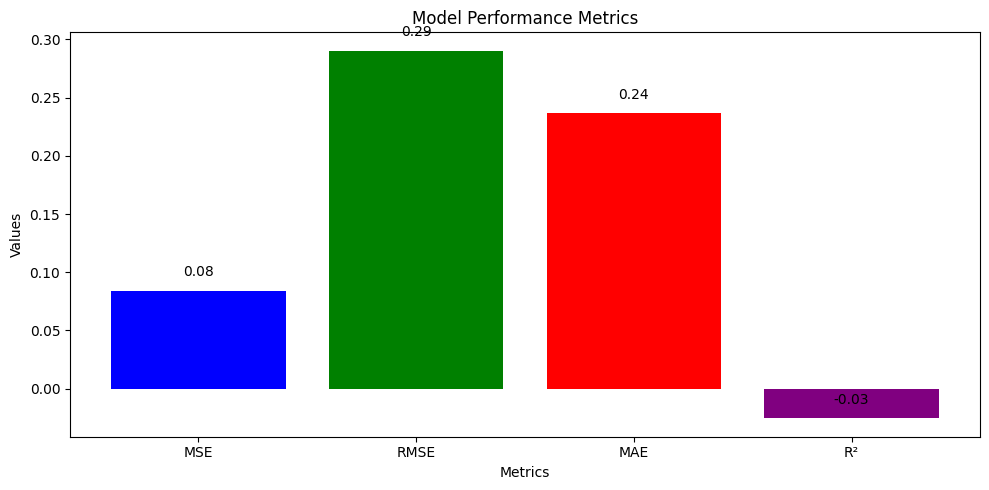

In [ ]:
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()